In [1]:
! pip install tensorflow


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
objects = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

11493376/11490434 [==============================] - 2s 0us/step


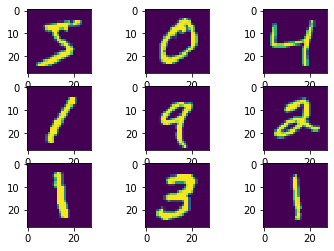

In [4]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(training_images[i])

In [5]:
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [6]:
training_images = training_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [7]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [8]:
model.fit(training_images, training_labels, epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2292 - accuracy: 0.9325
Epoch 2/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0947 - accuracy: 0.9715
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0662 - accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0507 - accuracy: 0.9837
Epoch 5/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0420 - accuracy: 0.9862


In [9]:
print(model.evaluate(test_images, test_labels))


10000/10000 [==============================] - 0s 42us/sample - loss: 0.0914 - accuracy: 0.9713
[0.0913783773623989, 0.9713]


2


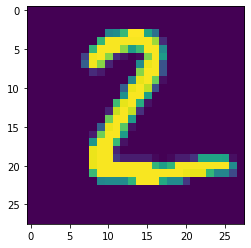

In [11]:
plt.imshow(test_images[1])
prediction = model.predict(test_images)
print(np.argmax(prediction[1]))

Recognition using DecisionTreeClassifier


In [13]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

data = pd.read_csv("mnist_train.csv").to_numpy()

In [14]:
print(data)


[[5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]


In [15]:
clf = DecisionTreeClassifier()


In [16]:
# Training dataset
x_train = data[0:21000, 1:]
train_label = data[0:21000, 0]

clf.fit(x_train, train_label)

DecisionTreeClassifier()

In [17]:
# Testing dataset
x_test = data[21000:, 1:]
test_label = data[21000:, 0]

In [19]:
# Acuuracy
p = clf.predict(x_test)
count = 0
for i in range(0, 21000):
    count +=1 if p[i] == test_label[i] else 0
    
print("Accuracy: ", (count/21000)*100)

Accuracy:  82.8952380952381
